**1. IMPORT LIBRARIES & LOAD DATA**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Load your dataset
df = pd.read_csv("/content/Warehouse_and_Retail_Sales.csv")

print("Dataset Loaded Successfully!")
df.head()

Dataset Loaded Successfully!


,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


**2. DATA CLEANING**

In [5]:
# Remove duplicates
df = df.drop_duplicates()

# Rename columns for consistency
df = df.rename(columns={
    "YEAR": "Year",
    "MONTH": "Month",
    "SUPPLIER": "Supplier",
    "ITEM CODE": "ItemCode",
    "ITEM DESCRIPTION": "ItemName", # Corrected from "ITEM DESCR"
    "ITEM TYPE": "ItemType",
    "RETAIL SALES": "RetailSale",       # Corrected from "RETAIL SALE"
    "RETAIL TRANSFERS": "RetailTransactions", # Corrected from "RETAIL TRAI"
    "WAREHOUSE SALES": "WarehouseSales"
})

# Convert to numeric safely
numeric_cols = ["RetailSale", "RetailTransactions", "WarehouseSales"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce").fillna(0)

df["Year"] = df["Year"].astype(int)
df["Month"] = df["Month"].astype(int)
df["ItemType"] = df["ItemType"].astype(str)

print("Data Cleaning Completed!")
df.head()

Data Cleaning Completed!


,Year,Month,Supplier,ItemCode,ItemName,ItemType,RetailSale,RetailTransactions,WarehouseSales
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


**3. FEATURE ENGINEERING**

In [6]:
# Combined Sales
df["TotalSales"] = df["RetailSale"] + df["WarehouseSales"]

# Estimated Profit (Assume 20% retail margin)
df["Profit"] = df["RetailSale"] * 0.20

# Month Name & Date
df["MonthYear"] = pd.to_datetime(df["Year"].astype(str) + "-" + df["Month"].astype(str) + "-01")

# Additional Features
df["SalesCategory"] = np.where(df["TotalSales"] > df["TotalSales"].median(), "High", "Low")

print("Feature Engineering Completed!")

Feature Engineering Completed!


**4. OUTLIER DETECTION**

In [7]:
Q1 = df["TotalSales"].quantile(0.25)
Q3 = df["TotalSales"].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df["TotalSales"] < (Q1 - 1.5 * IQR)) | (df["TotalSales"] > (Q3 + 1.5 * IQR))]
print("Detected Outliers:", len(outliers))

Detected Outliers: 45011


**5. SUMMARY STATISTICS**

In [8]:
print("\n=== SUMMARY STATISTICS ===")
print(df.describe(include="all"))


=== SUMMARY STATISTICS ===
                 Year          Month                           Supplier  \
count   307645.000000  307645.000000                             307478   
unique            NaN            NaN                                396   
top               NaN            NaN  REPUBLIC NATIONAL DISTRIBUTING CO   
freq              NaN            NaN                              20995   
mean      2018.438525       6.423862                                NaN   
min       2017.000000       1.000000                                NaN   
25%       2017.000000       3.000000                                NaN   
50%       2019.000000       7.000000                                NaN   
75%       2019.000000       9.000000                                NaN   
max       2020.000000      12.000000                                NaN   
std          1.083061       3.461812                                NaN   

       ItemCode                  ItemName ItemType     RetailSale  \
co

**6. CATEGORY-LEVEL SALES ANALYSIS**

/tmp/ipython-input-3389221541.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette="Blues")


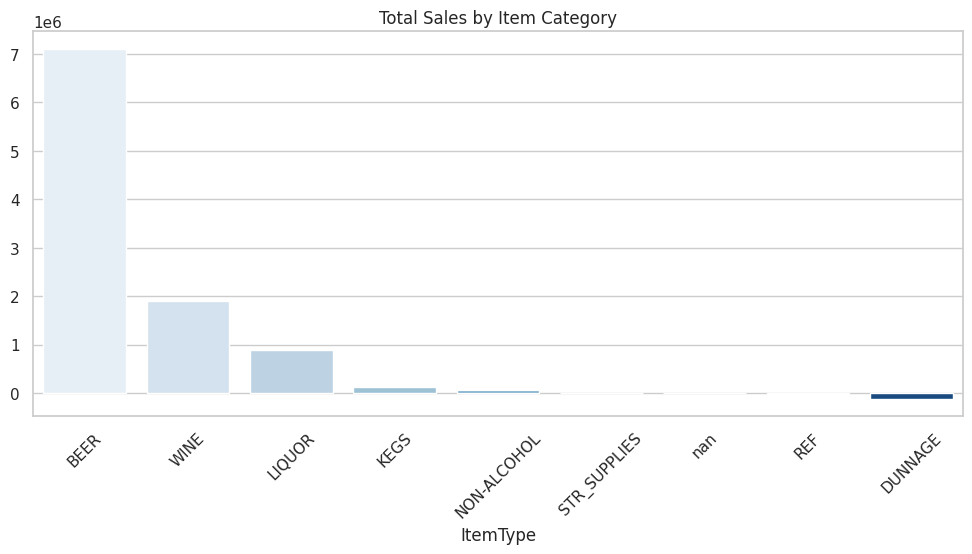


INSIGHT: Highest-selling category is: BEER


In [9]:
category_sales = df.groupby("ItemType")["TotalSales"].sum().sort_values(ascending=False)

plt.figure(figsize=(12,5))
sns.barplot(x=category_sales.index, y=category_sales.values, palette="Blues")
plt.title("Total Sales by Item Category")
plt.xticks(rotation=45)
plt.show()

print("\nINSIGHT: Highest-selling category is:", category_sales.idxmax())

**7. MONTHLY TREND ANALYSIS**

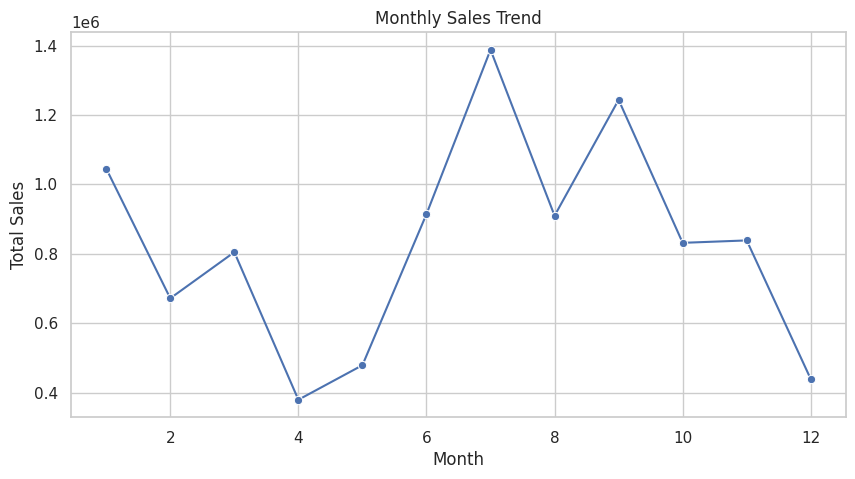


INSIGHT: Best performing month is: 7


In [10]:
monthly = df.groupby("Month")["TotalSales"].sum()

plt.figure(figsize=(10,5))
sns.lineplot(x=monthly.index, y=monthly.values, marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

print("\nINSIGHT: Best performing month is:", monthly.idxmax())

**8. SUPPLIER PERFORMANCE ANALYSIS**

/tmp/ipython-input-608993327.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=supplier_sales.index, y=supplier_sales.values, palette="Greens")


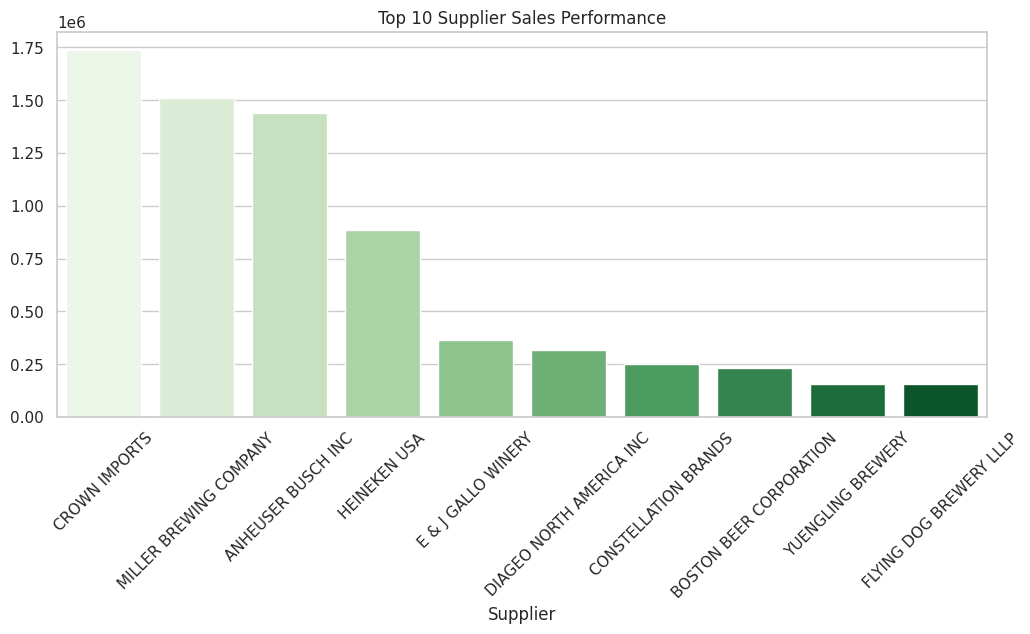


INSIGHT: Top-performing supplier is: CROWN IMPORTS


In [11]:
supplier_sales = df.groupby("Supplier")["TotalSales"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,5))
sns.barplot(x=supplier_sales.index, y=supplier_sales.values, palette="Greens")
plt.title("Top 10 Supplier Sales Performance")
plt.xticks(rotation=45)
plt.show()

print("\nINSIGHT: Top-performing supplier is:", supplier_sales.idxmax())


**9. TOP 10 BEST SELLING ITEMS**

/tmp/ipython-input-4123020352.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.index, y=top_items.values, palette="viridis")


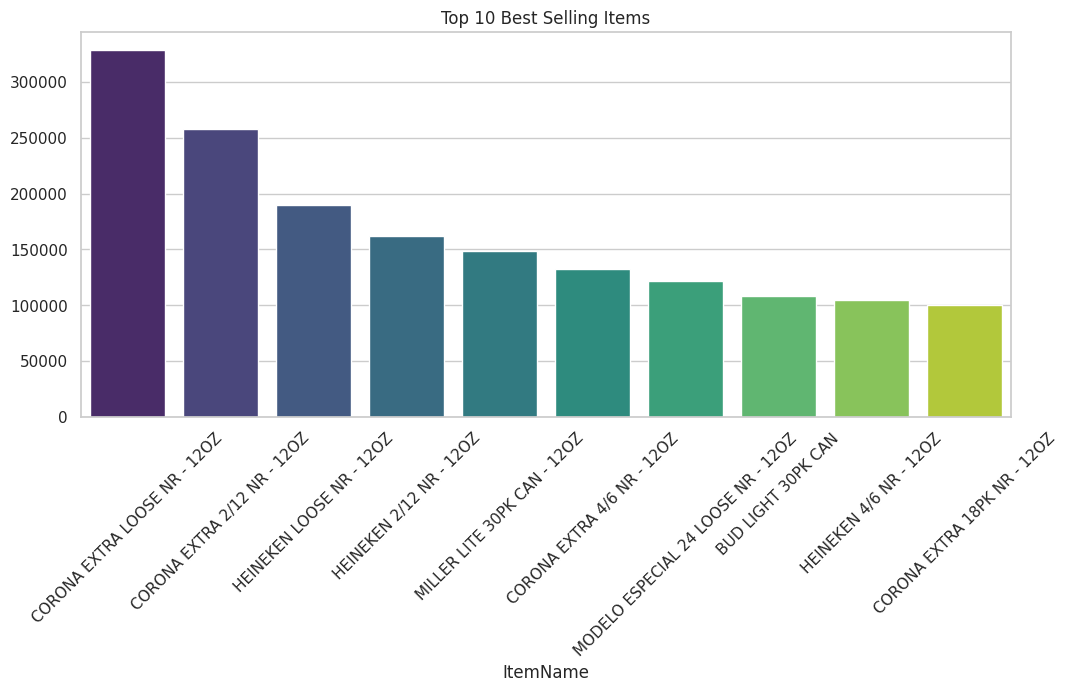


INSIGHT: Best-selling item is: CORONA EXTRA LOOSE NR - 12OZ


In [12]:
top_items = df.groupby("ItemName")["TotalSales"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,5))
sns.barplot(x=top_items.index, y=top_items.values, palette="viridis")
plt.title("Top 10 Best Selling Items")
plt.xticks(rotation=45)
plt.show()

print("\nINSIGHT: Best-selling item is:", top_items.idxmax())

**10. CORRELATION ANALYSIS**

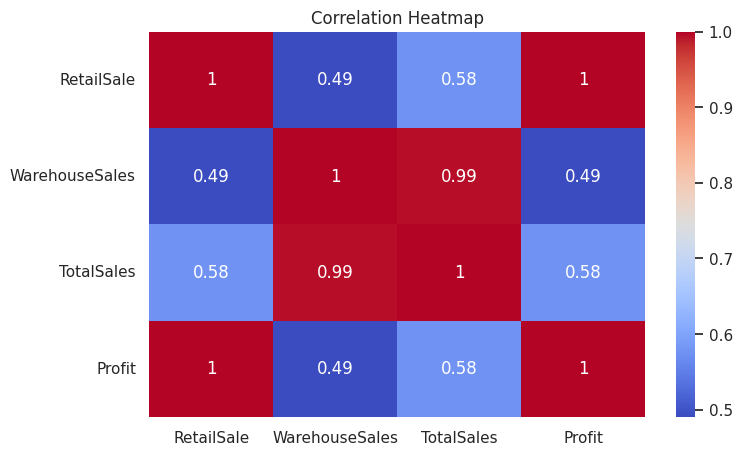


INSIGHT:
- TotalSales is strongly influenced by RetailSale & WarehouseSales.
- Profit is correlated only with RetailSale (expected).


In [13]:
plt.figure(figsize=(8,5))
corr = df[["RetailSale","WarehouseSales","TotalSales","Profit"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

print("\nINSIGHT:")
print("- TotalSales is strongly influenced by RetailSale & WarehouseSales.")
print("- Profit is correlated only with RetailSale (expected).")

**11. SIMPLE SALES FORECAST**

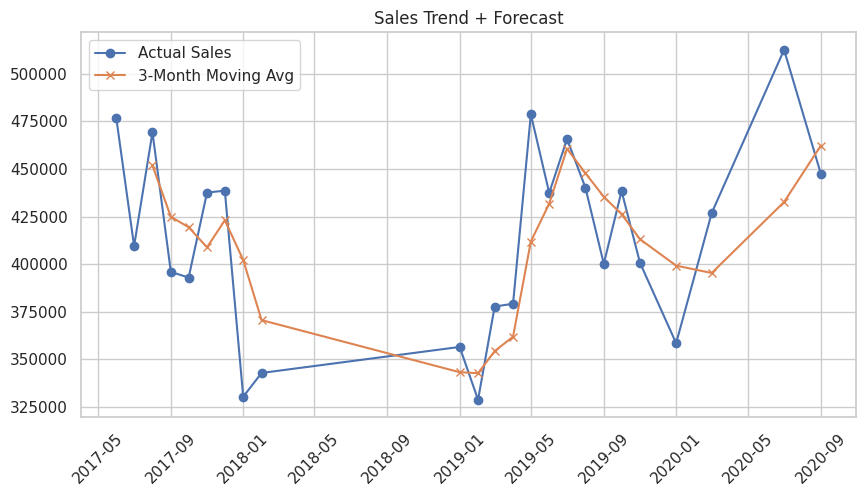

In [14]:
monthly_df = df.groupby("MonthYear")["TotalSales"].sum().reset_index()
monthly_df["Forecast"] = monthly_df["TotalSales"].rolling(window=3).mean()

plt.figure(figsize=(10,5))
plt.plot(monthly_df["MonthYear"], monthly_df["TotalSales"], marker="o", label="Actual Sales")
plt.plot(monthly_df["MonthYear"], monthly_df["Forecast"], marker="x", label="3-Month Moving Avg")
plt.legend()
plt.title("Sales Trend + Forecast")
plt.xticks(rotation=45)
plt.show()

**12. SAVE CLEAN DATA FOR POWER BI**

In [15]:
df.to_csv("/content/clean_warehouse_retail.csv", index=False)
monthly_df.to_csv("/content/monthly_trend.csv", index=False)

print("\nCLEAN FILES SAVED SUCCESSFULLY!")
print("Project Completed 🎉")


CLEAN FILES SAVED SUCCESSFULLY!
Project Completed 🎉
